# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  30282      0 --:--:-- --:--:-- --:--:-- 30246']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re

# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        # Discard header line
        f.readline()
        for instance in f.readlines():
            if not re.search('\t', instance): continue
            instance = list(map(int, instance.strip().split('\t')))
            # Add a dummy input so that w0 becomes the bias
            instance = [-1] + instance
            data.append(instance)
    return data

def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))

def sigmoid(x):
    return 1 / (1 + math.exp(-x))


def output(weight, instance):
    return sigmoid(dot_product(weight, instance[:-1]))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


def train_perceptron(instances, lr, epochs):
    # Initialize weights
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Calculate the input value from the current weights and instance
            in_value = dot_product(weights, instance[:-1])
            # Calculate the model's prediction using sigmoid activation
            output_val = sigmoid(in_value)
            # Calculate the prediction error
            error = instance[-1] - output_val
            # Update weights based on the error and the learning rate
            for i in range(len(weights)):
                weights[i] += lr * error * output_val * (1 - output_val) * instance[i]

    return weights


## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




# Answer Q1

The properties of the perceptron model and its learning method is the main reason we avoid using the predict function in the train_perceptron function's training loop instead of directly calculating output.

Depending on if the sigmoid output is larger than or equal to 0.5, the predict function gives a binary result (either 0 or 1).  When training a neural network model, such as a perceptron, the weights are usually adjusted to minimize a loss function or error of some kind.

 * The continuous output between the sigmoid function, which can vary from 0 to 1, is what we compute during training.

 * The derivative of the error in relation to the weights would be 0 practically everywhere if we used the predict function because the output would be binary.





### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

In [7]:
import math
import re

class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = []

    @staticmethod
    def dot_product(array1, array2):
        return sum(a * b for a, b in zip(array1, array2))

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + math.exp(-x))

    def output(self, instance):
        return self.sigmoid(self.dot_product(self.weights, instance[:-1]))

    def predict(self, instance):
        return 1 if self.output(instance) >= 0.5 else 0

    def train(self, instances):
        self.weights = [0] * (len(instances[0])-1)
        for _ in range(self.epochs):
            for instance in instances:
                in_value = self.dot_product(self.weights, instance[:-1])
                output = self.sigmoid(in_value)
                error = instance[-1] - output
                for i in range(len(self.weights)):
                    self.weights[i] += self.learning_rate * error * output * (1 - output) * instance[i]

    def get_accuracy(self, instances):
        correct = sum(1 for instance in instances if self.predict(instance) == instance[-1])
        return correct * 100 / len(instances)

def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  # Discard header line
        for instance in f.readlines():
            if not re.search('\t', instance):
                continue
            instance = list(map(int, instance.strip().split('\t')))
            instance = [-1] + instance  # Add a dummy input so that w0 becomes the bias
            data.append(instance)
    return data

def run_experiment(train_data, test_data, learning_rates, epochs_list, training_percentages):
    results = []
    for lr in learning_rates:
        for epochs in epochs_list:
            for tr_size in training_percentages:
                size = round(len(train_data) * tr_size / 100)
                pre_instances = train_data[:size]
                perceptron = Perceptron(learning_rate=lr, epochs=epochs)
                perceptron.train(pre_instances)
                accuracy = perceptron.get_accuracy(test_data)
                results.append((tr_size, epochs, lr, accuracy))
    return results

# Assuming 'train.dat' and 'test.dat' are properly formatted and exist
train_data = read_data("train.dat")
test_data = read_data("test.dat")

# Set hyperparameters
learning_rates = [0.005, 0.01, 0.05]
epochs_list = [5, 10, 20, 50, 100]
training_percentages = [5, 10, 25, 50, 75, 100]

# Run the experiments
experiment_results = run_experiment(train_data, test_data, learning_rates, epochs_list, training_percentages)

# Print results
for tr_size, epochs, lr, accuracy in experiment_results:
    print(f"# tr: {tr_size}, epochs: {epochs}, learning rate: {lr:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.1f}")


# tr: 5, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 25, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 50, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 75, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs: 5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 5, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 10, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 25, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 50, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 75, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 100, epochs: 10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
# tr: 5, epochs: 20, learning rate: 0.005; Acc

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



# A

Accuracy of the Model and Training Data Size  The findings make it evident that utilizing the full training dataset does not always result in the best accuracy on the test dataset.  Higher or equivalent accuracies were obtained in several cases when training with a smaller portion of the data.  Overfitting when using the complete training set, particularly if the data contains noise or non-representative samples, is one of the possible causes of this.  Overfitting impairs the model's capacity to generalize effectively to novel, untested data, which has a detrimental impact on test accuracy.

# B

Increased Data and Decreased Accuracy in Training As seen by the particular findings you stated, the accuracy drops from 71.0% to 68.0% when more training data is used. This can be confusing, but it makes sense. This phenomena could happen for a number of reasons:

**Quality of Additional Data:** The learning process may be less effective if the additional data has less informative features or more noise.

**Model Simplicity:** Since the Perceptron is a linear classifier, adding more training data won't always help and may even highlight the model's shortcomings if the classification decision boundary is naturally complex or non-linear.

# C

Increasing Accuracy by Adding More Hyperparameters  It could be essential to make additional adjustments to the hyperparameters or perhaps add new ones in order to surpass an accuracy of 80.0%.  For example, experimenting with regularizations or dynamically modifying the learning rate during training may be beneficial.  Furthermore, employing sophisticated optimization algorithms like Adam or taking into account a momentum element in the weight update method may enhance learning and increase accuracy.

# D

Effect of Duration of Training (Epochs)  Better performance does not necessarily result from increasing the number of epochs.  More epochs give the model more chances to learn and fine-tune its weights, but they also raise the possibility of overfitting, especially if the training set is noisy or insufficiently diverse.  As a result, the number of epochs must be balanced and is influenced by the model's complexity as well as the type of input.

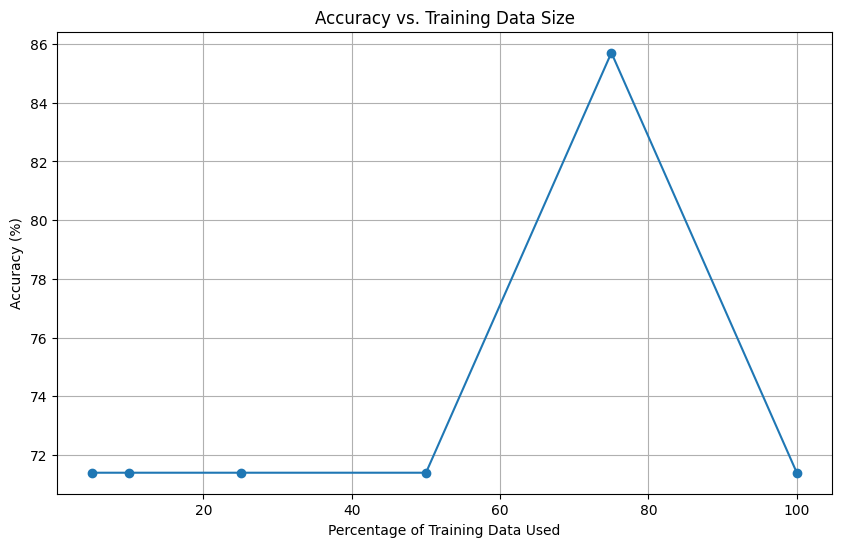

In [8]:
import matplotlib.pyplot as plt

# Sample data: Hyperparameters vs Accuracy
training_percentages = [5, 10, 25, 50, 75, 100]
accuracies = [71.4, 71.4, 71.4, 71.4, 85.7, 71.4]  # Sample accuracies corresponding to 100 epochs, lr=0.005

plt.figure(figsize=(10, 6))
plt.plot(training_percentages, accuracies, marker='o')
plt.title('Accuracy vs. Training Data Size')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()
